## Neural Network with a single hidden layer

#### Data Import - cats vs dogs data

In [181]:
# Load the data
from PIL import Image
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import os, sys

%matplotlib inline

# Rescale the image to a fixed size
def rescale_img(img, size):
    return img.resize(size, Image.ANTIALIAS)

# read the image as a numpy array
def img_to_array(img):
    return np.array(img,
                   np.uint8).reshape(img.size[1], img.size[0], 3)

# label the image based on its file name
def label_image(img):
    # filename has label appended before the extension e.g cat.0.jpg
    file_name = img.split('.')[-3]
    if file_name == 'cat':
        return [1, 0]
    else:
        return [0, 1]
    
# load the data
def load_dataset(path, kind, size):
    training_data = []        
    for f in os.listdir(path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in ['.jpg']: continue
        img = Image.open(os.path.join(path, f))
        label = label_image(f)
        img = rescale_img(img, size)
        training_data.append([np.array(img), np.array(label)])
        img.close()
    shuffle(training_data)
    return training_data

path = "./data/train_sample"
X_orig = load_dataset(path, 'test', (128, 128))



#### Data Pre-processing
Split the data into training and test sets

In [225]:
# Split the data into training and test set (98% - 2%)
X_orig_train = X_orig[:-120]
X_orig_test = X_orig[-120:]
# Extract training data and its corresponding label
X_train = np.array([i[0] for i in X_orig_train])
y_train = np.array([i[1][0] for i in X_orig_train]).reshape(-1, 1).T
# Extract test data and its corresponding label
X_test = np.array([i[0] for i in X_orig_test])
y_test = np.array([i[1][0] for i in X_orig_test]).reshape(-1, 1).T


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(582, 128, 128, 3)
(1, 582)
(120, 128, 128, 3)
(1, 120)


Data Summary

In [226]:
training_size = X_train.shape[0]
image_size = X_train.shape[1]
training_data_shape = X_train.shape
test_size = X_test.shape[0]
test_data_shape = X_test.shape

print("Number of training examples: " + str(training_size))
print("Number of test examples: " + str(test_size))
print("Height/width of each image: " + str(image_size))
print("Shape of training set X: " + str(training_data_shape))
print("Shape of test set X: " + str(test_data_shape))
print("Shape of training set y: " + str(y_train.shape))
print("Shape of test set y: " + str(y_test.shape))

Number of training examples: 582
Number of test examples: 120
Height/width of each image: 128
Shape of training set X: (582, 128, 128, 3)
Shape of test set X: (120, 128, 128, 3)
Shape of training set y: (1, 582)
Shape of test set y: (1, 120)


Reshape the training and test data sets so that images are flatten into one single vector of the form (width $*$ height $*$ 3, 1)

In [227]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
print("Shape of flattened training set X: " + str(X_train_flatten.shape))
print("Shape of training set y: " + str(y_train.shape))
print("Shape of flattened test set X: " + str(X_test_flatten.shape))
print("Shape of test set y: " + str(y_test.shape))


Shape of flattened training set X: (49152, 582)
Shape of training set y: (1, 582)
Shape of flattened test set X: (49152, 120)
Shape of test set y: (1, 120)


Standardize the data

In [228]:
X_train_std = X_train_flatten/255.
X_test_std = X_test_flatten/255.

#### Building a simple neural network with a single hidden layer
- Define the neural network structure (# of inputs, # of hidden units, # of output units etc)
- Initialize the parameters of the model
- Loop
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters - weights and biases (gradient descent)
- Use the learned parameters to make predictions
- Analyse the results

#### Helper functions
a. Activation Functions

In [186]:
# sigmoid function
def sigmoid(z):
    """
    Compute the sigmoid of z   
    """
    s = 1/(1 + np.exp(-z))
    return s

print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [ 0.5         0.88079708]


b. Network structure

In [187]:
def layer_sizes(X, n_h, y):
    n_x = X.shape[0] # size of input layer
    n_h = n_h # no. of units in hidden layer
    n_y = y.shape[0] # no. of units in output layer
        
    return (n_x, n_h, n_y)

c. Initialize Parameters
    - Initialize weights matrices with random values
    - Initialize bias vectors as zeros

In [188]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                 "b1": b1,
                 "W2": W2,
                 "b2": b2}
    return parameters

d. Forward Propagation

In [189]:
def forward_propagation(X, parameters):
    
    #extract weights and biases
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Compute weighted sum and activation
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1) # tanh activation function for hidden layer
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2}
    
    return A2, cache
    
    

e. Cross-Entropy Loss Function

In [190]:
def compute_cost(A2, y, parameters):
    m = y.shape[1] # no. of examples
    
    #compute the cross-entropy loss function
    cost = -(1./m) * (np.sum(y * np.log(A2) + (1 - y) * np.log(1 - A2)))
    cost = np.squeeze(cost)
    return cost

f. Backward Propagation

In [191]:
def backward_propagation(parameters, cache, X, y):
    m = X.shape[1] # no. of examples
    
    # extract weights and biases
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    # Retrieve activations A1 and A2 from cached
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation
    dZ2 = A2 - y
    dW2 = (1./m) * np.dot(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2)) # g'(Z1)  = (1 - A^2)
    dW1 = (1./m) * np.dot(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
             "db2": db2
            }
    return grads

g. Gradient Descent (update parameters)

In [192]:
def update_parameters(parameters, grads, learning_rate = 0.001):
    #extract parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # extract gradients
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]    
    
    # update weights and biases
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2    
    
    #return updated parameters
    
    parameters = {"W1": W1,
                 "b1": b1,
                 "W2": W2,
                 "b2": b2}
    return parameters    
    

#### Integrate all the helper functions into a neural network model

In [242]:
def nn_model(X, y, n_h, num_iterations = 10000, learning_rate = 0.001, print_cost = False):

    np.random.seed(3)   
    n_x = layer_sizes(X, n_h, y)[0] # no. of features
    n_y = layer_sizes(X, n_h, y)[2] # no. of hidden layers
    
    #initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    costs = []
    
    #iterate over no. of iterations
    for i in range(0, num_iterations):
        #start with fwd-prop
        A2, cache = forward_propagation(X, parameters)
        
        #compute cost
        cost = compute_cost(A2, y, parameters)

        
        #back-prop
        grads = backward_propagation(parameters, cache, X, y)
        
        #gradient descent
        parameters = update_parameters(parameters, grads, learning_rate = learning_rate)
        
        # print the cost every 1000 iteration
        if print_cost and i % 1000 == 0:
            costs.append(cost)        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
            
            
    d = {"costs": costs,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}             
    return parameters, d
        
        
        

In [243]:
def predict(parameters, X):
    
    #Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = np.where(A2 > 0.5, 1, 0)
    return predictions
    

In [244]:
parameters, d = nn_model(X_train_std, y_train, n_h = 4, num_iterations = 10000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.691612
Cost after iteration 1000: 0.575514
Cost after iteration 2000: 0.388818
Cost after iteration 3000: 0.414194
Cost after iteration 4000: 0.149818
Cost after iteration 5000: 0.091796
Cost after iteration 6000: 0.072608
Cost after iteration 7000: 0.060874
Cost after iteration 8000: 0.046873
Cost after iteration 9000: 0.041722


In [245]:
# Print accuracy
predictions_train = predict(parameters, X_train_std)
predictions_test = predict(parameters, X_test_std)
# print train/test errors
print ('Train Accuracy: %d' % float((np.dot(y_train,predictions_train.T) + np.dot(1-y_train,1-predictions_train.T))/float(y_train.size)*100) + '%')
print ('Test Accuracy: %d' % float((np.dot(y_test,predictions_test.T) + np.dot(1-y_test,1-predictions_test.T))/float(y_test.size)*100) + '%')

Train Accuracy: 99%
Test Accuracy: 61%


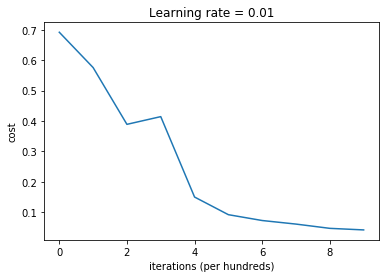

In [246]:
costs = d["costs"]
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = "+ str(d["learning_rate"]))
plt.show()

(1, 120)
(1, 120)
(120, 128, 128, 3)


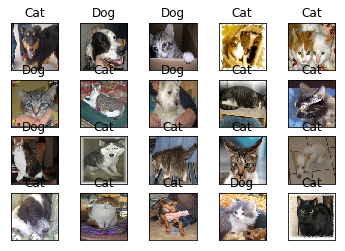

"\na = np.where(y_test != predictions_test, 0, 1)\nprint(a.shape)\nmiscl_img = X_test[y_test[0][:] != predictions_test[0][:]]\ncorrect_lab = y_test[0][y_test[0][:] != predictions_test[0][:]]\nmiscl_lab= predictions_test[0][y_test[0][:] != predictions_test[0][:]] # misclassified label\nprint(miscl_img.shape)\nprint(correct_lab.shape)\nprint(miscl_lab.shape)\n\nfig, ax = plt.subplots(nrows=6, ncols=6, sharex=True, sharey=True,)\nax = ax.flatten()\nfor i in range(miscl_img.shape[0]):\n    img = X_test[i]\n    ax[i].imshow(img, cmap='Greys', interpolation='nearest')\n    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))\n\nax[0].set_xticks([])\nax[0].set_yticks([])\nplt.tight_layout()\n# plt.savefig('./figures/mnist_miscl.png', dpi=300)\nplt.show()\n\n"

In [247]:

import scipy
from scipy import ndimage

#y_test = y_test.T
print(predictions_test.shape)
print(y_test.shape)
print(X_test.shape)
#imgs = []
fig = plt.figure()
for idx, item in enumerate(y_test[0][:20]):
    y = fig.add_subplot(4, 5, idx + 1)
    
    if(predictions_test[0][idx] == 1): str_label = "Cat"
    else: str_label = "Dog"
        #imgs.append[X_test[i]]
        #print(predictions_test[0][i])
    y.imshow(X_test[idx],cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    #print(idx, item)
plt.show()
#print(y_test[0][:])


'''
a = np.where(y_test != predictions_test, 0, 1)
print(a.shape)
miscl_img = X_test[y_test[0][:] != predictions_test[0][:]]
correct_lab = y_test[0][y_test[0][:] != predictions_test[0][:]]
miscl_lab= predictions_test[0][y_test[0][:] != predictions_test[0][:]] # misclassified label
print(miscl_img.shape)
print(correct_lab.shape)
print(miscl_lab.shape)

fig, ax = plt.subplots(nrows=6, ncols=6, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(miscl_img.shape[0]):
    img = X_test[i]
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_miscl.png', dpi=300)
plt.show()

'''


y = 1


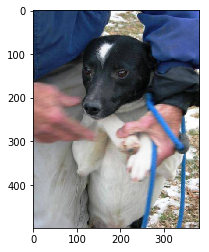

In [251]:
import scipy
from scipy import ndimage

num_px = 128
fname = "./data/test/1.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(parameters, my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)))